# NumPy, SciPy and matplotlib

A wide number of scientific displines have turned to python as a programming language for its easy syntax and ease of installation (among other things). As a result there's a thriving scientific community that collaborates on general purpose open sourse projects. Most people would regard NumPy, SciPy and matplotlib the core python scientific packages (actually more and more people include iPython and jupyter notebooks as well).

* NumPy: This is the numerical python library. Usually most mathematical functions that you will need are in numpy. It also defines fast arrays (c-level arrays) and many operations to manage them.
* SciPy: The scientific python library. It grabs NumPy and adds robust algorithms used in all sorts of scientific disciplines. Statistics, regressions, special functions, linear algebra and other are included.
* matplotlib: python's main plotting library. You can everything from scatter plots to 3d 

We're going through the basics of each library and introduce some useful functions from each.

## Importing

Before we can use these libraries we need to import them; that is load their contents into memory so that we can use them. The standard syntax looks like this

In [ ]:
import libraryIwantToUse

libraryIwantToUse.functionIneed()   # This is how you would call a function in the library

For common libraries like the ones we are discussing today, people have developed some shorthand notations.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Numpy: Arrays!

The main feature from numpy we want to highlight is their arrays, and array manipulations. First we need to import the numpy library.

In [5]:
import numpy as np

data = [9,4,18,194,1]
arr = np.array(data)

print(type(arr))
print(arr)

<class 'numpy.ndarray'>
[  9   4  18 194   1]


The array function can take any iterable container (lists, tuples, generators) and turn them into a numpy array. You can still index and slice them like lists or tuples. However, there is no append; once you make an array it must remain that size. The beauty of this array is that it is defined to be fast.

In [11]:
data = range(1000000)
arr  = np.array(data)

In [12]:
%timeit sum(data)

10 loops, best of 3: 24.9 ms per loop


In [13]:
%timeit np.sum(arr)

1000 loops, best of 3: 939 µs per loop


In general if you can figure out where to use numpy arrays, you can make your code 10 to 100 times faster.

We'll go through some array creation techniques.

In [21]:
a = np.arange(-4,3,2)     # array range, it takes the same arguments as range
b = np.linspace(0,10,15)  # makes an array from 0 to 10 with 15 evenly spaced entries
c = np.zeros([3,3])       # makes a 3x3 array of zeros
d = np.ones([2,3])        # makes a 2x3 array of ones
e = np.eye(4)             # makes 4x4 identity array  

In [22]:
for _ in [a,b,c,d,e]:
    print(_)
    print('-'*50)

[-4 -2  0  2]
--------------------------------------------------
[  0.           0.71428571   1.42857143   2.14285714   2.85714286
   3.57142857   4.28571429   5.           5.71428571   6.42857143
   7.14285714   7.85714286   8.57142857   9.28571429  10.        ]
--------------------------------------------------
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
--------------------------------------------------
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
--------------------------------------------------
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
--------------------------------------------------


It's important to realize what kinds of operations you can do with arrays

In [50]:
a = np.arange(4)
print( a , end='\n\n')
print(a + 5, end='\n\n')
print(a * 2, end='\n\n')
print(a*a)

[0 1 2 3]

[5 6 7 8]

[0 2 4 6]

[0 1 4 9]


In [51]:
M = np.ones([3,3])*2 - 6 * np.eye(3)
print( M , end='\n\n')
print( M + 3 , end='\n\n')
print( M*M )

[[-4.  2.  2.]
 [ 2. -4.  2.]
 [ 2.  2. -4.]]

[[-1.  5.  5.]
 [ 5. -1.  5.]
 [ 5.  5. -1.]]

[[ 16.   4.   4.]
 [  4.  16.   4.]
 [  4.   4.  16.]]


The last thing I want to mention is that numpy provides many many math functions and constants

In [25]:
print( np.cos( 2*np.pi ) )
print( np.log( np.e ) )
print( np.log10(100) )

1.0
1.0
2.0


And they are much faster and accurate than most things you could write on your own!

## SciPy: Tools Galore!

SciPy gives you all the tools you need to do some complicated scientific analyses. Let's take a look at scipy.integrate

https://docs.scipy.org/doc/scipy/reference/integrate.html

In [28]:
from scipy.integrate import quad    # quad for quadrature

# Grabbing this from the functions lesson
def squared(x):
    return x*x

In [29]:
print( quad( squared, -5, 15 ) )

(1166.6666666666665, 1.2952601953960159e-11)


In [33]:
%timeit quad(squared, -5, 15)

The slowest run took 15.64 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.31 µs per loop


Needless to say, it's fast (and it caches to make calcualtions you do often take less time). At this point you might be wondering what the second output of quad is, you might even be asking how to use quad yourself. Let's take a look at the documentation.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

We can see in yellow the function signture. The first three arguments are the only mandatory arguments, all the others have defauls assigned to them. 

By looking under parameters we see what each of these arguments must be. Scrolling down more, we see that the function returns the integral and estimate of the error on that integral.

Now let's take a look at scipy.linalg

https://docs.scipy.org/doc/scipy/reference/linalg.html

In [44]:
from scipy.linalg import inv, eig

a = np.ones([2,2]) + np.eye(2)

a_inverse = inv(a)    # inv calculates the inverse matrix

eigenvalues, eigenvectors = eig(a)

for _ in [a, a_inverse, a.dot(a_inverse), eigenvalues, eigenvectors]:
    print(_)
    print('-'*50)

[[ 2.  1.]
 [ 1.  2.]]
--------------------------------------------------
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
--------------------------------------------------
[[ 1.  0.]
 [ 0.  1.]]
--------------------------------------------------
[ 3.+0.j  1.+0.j]
--------------------------------------------------
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
--------------------------------------------------


Here is a the documentation page for the various modules in scipy:

https://docs.scipy.org/doc/scipy/reference/index.html

## matplotlib: plotting... everyone needs plotting

matplotlib gives you easy hooks to different plotting functions. There are two interfaces for matplotlib: pylab and pyplot. I use pyplot, but pylab works just as well. Let's start by making some simple plots

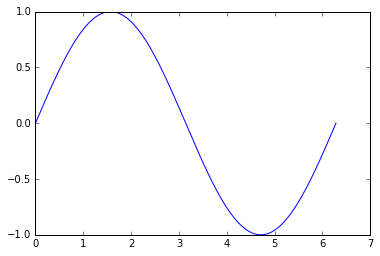

In [5]:
# This is so that the plots are embedded into this notebook, you can ignore it for now if you want
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

plt.plot(x,y)
plt.show()

So plot will grab a list or container of x values and a matching list or container of y values. It will then plot the points on the screen and connect the points. If you have enough points then the line looks smooth. Let's try less points

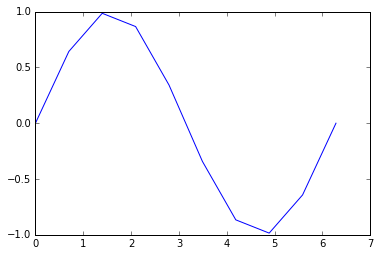

In [63]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

plt.plot(x,y)
plt.show()

In fact we can make it show the dots themselves. The third element for plot can be a string detailing how you want stuff to be plotted.

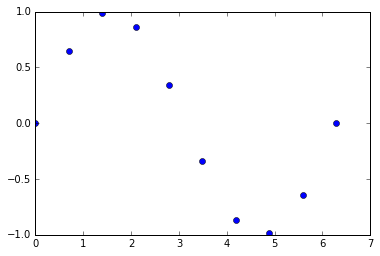

In [64]:
plt.plot(x,y, 'o')
plt.show()

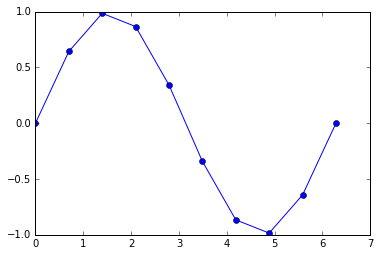

In [65]:
plt.plot(x,y,'o-')
plt.show()

We can make our graphs a lot prettier. We can label the axis, add titles, put legends, have multiple plots, etc.

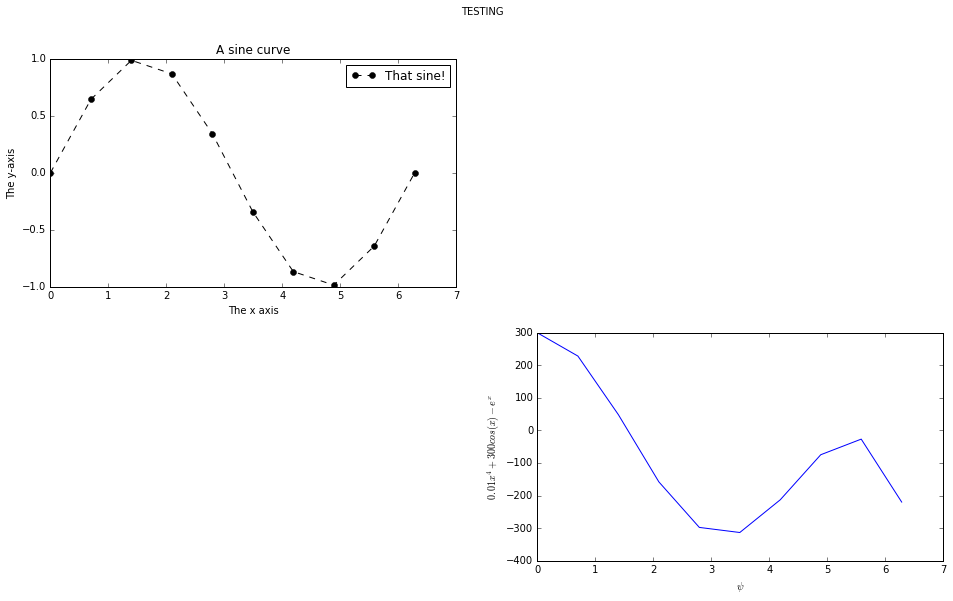

In [91]:
plt.figure(figsize=(16,9))   # make a figure with bigger size (16:9 aspect ratio)

plt.subplot(2,2,1)   # Go to the first plot of a 2x2 subplot
plt.plot(x, y, 'ok--', label='That sine!')   # label is used by the legend function
plt.xlabel('The x axis')
plt.ylabel('The y-axis')
plt.title('A sine curve')
plt.legend(loc='best')    # Use the labels to build a legend, and place it in the best location

plt.subplot(2,2,4)
plt.plot(x, 0.01*x**4 + 300*np.cos(x) - np.e**(x))
plt.xlabel('$\\psi$')    # We can even do latex notation
plt.ylabel('$ 0.01 x^4 + 300 cos(x) - e^x $')

plt.suptitle('TESTING')    # Overall plot title
plt.show()

You can also do scatter, and hist to do scatter plots and histograms. imshow will allow you to display images (or heatmaps). We'll gloss over those for now and instead show an example of a 3d plot, since those can be a bit harder to do.

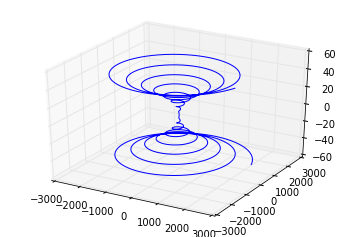

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()   # make a figure
ax  = fig.add_subplot(111, projection='3d')   # add a set of 3d axis to the plot

t = np.linspace(-50,50,10000)   # parametrize with t
r = t**2 + 1                    # make a radius that depends on t
x = r*np.cos(t)                 # the x equation
y = r*np.sin(t)                 # the y equation
z = t                           # z just the t axis

plt.plot(x,y,z)                 # this axis' plot gives you three required arguments
plt.show()

# Projects

Data analysis, linear regressions and plotting are things that you will have to do over and over again in your undergrad. In a csv you will find x and y values. The x and y values will be the first and second columns. The error in x and the error in y will be the third and fourth columns.

* Use numpy to load the data (take a look at np.readtxt)
* Make a plot of y as a function of x. Remember to include the error bars (hint google which matplotlib function you need)
* Using a linear regression (check scipy for linregress), add a line of best fit and make sure the equation shows up in the legend for the plot
* save your figure

OR

Given the following DE:

$ \frac{dy}{dx} = - y \cdot sin(y) $

plot the numrical solution for $y(0) = -0.5$ and $y(0)=1$ (check around scipy for odeint [for ordinary differential equation integrator])

OR

The Lorentz attractor is a system of ODEs that is notable for having chaotic behaviour (ie exhibit wild changes in output due to small changes in input).

https://en.wikipedia.org/wiki/Lorenz_system

Solve the system of DEs:

$\frac{dx}{dt} = \sigma(y-x)$

$\frac{dy}{dt} = x(\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z$

for $\sigma=10, \beta=8/3, \rho=28$ and starting condition $x=2,y=3,z=4$.
Play around with the domain of t until you find something you think looks cool. Feel free to ask about how to approach the problem!